# Custom Object Recognition

<img src = 'object.PNG'>

In [448]:
import os

import cv2

import numpy as npy
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [449]:
import warnings
warnings.filterwarnings('ignore')

In [450]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [451]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam


In [452]:
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')


In [453]:

from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Capturing Multiple Images of an Object

In [486]:
target = []
flag = True

In [455]:
while flag:
    label = input('Name Of Cutom Object :')
    target.append(label)


    path = r"C:/Users/aatif/Documents/MachineLearning & Deep Learning/Final Project/image/"+ label
    os.mkdir(path)

    cap = cv2.VideoCapture(0)
    cpt = 0

    while True:

        # frame frame
        _, frame = cap.read()



        cv2.imshow("Mera Cam", frame)

        if cv2.waitKey(0) & 0xFF == ord('s'):

            cv2.imwrite(path+'/'+ label +str(cpt)+'.jpg', frame)
            cpt +=1
            print(cpt)
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    
    f = input('Add new object? Y/N')
    if f == 'Y':
        flag = True
    else:
        flag = False
        

Name Of Cutom Object :smartphone
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
Add new object? Y/NN


# Loading Data

In [502]:
path = os.getcwd()

In [503]:
path

'C:\\Users\\aatif\\Documents\\MachineLearning & Deep Learning\\Final Project'

In [504]:
data_path = path+'\\image'

data_dir_list = os.listdir(data_path)
data_dir_list

['ball', 'book', 'clock', 'human', 'schoolbag', 'smartphone', 'sunglasses']

In [505]:
num_epoch=200

In [506]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=200
# Define the number of classes
num_classes = len(data_dir_list)
img_data_list=[]
leng = []
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'\\'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    leng.append(len(os.listdir(data_path + '\\'+dataset)))
    
    for img in img_list:
        input_img=cv2.imread(data_path + '\\'+ dataset + '\\'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-ball

Loaded the images of dataset-book

Loaded the images of dataset-clock

Loaded the images of dataset-human

Loaded the images of dataset-schoolbag

Loaded the images of dataset-smartphone

Loaded the images of dataset-sunglasses

(5345, 128, 128)


In [507]:
if num_channel==1:
    if K.image_data_format()=='th':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=3) 
        print (img_data.shape)
        
else:
    if K.image_data_format()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)

(5345, 128, 128, 1)


In [508]:
num_classes = len(data_dir_list)
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:leng[0]]=0
for i in range(1,num_classes):
    labels[leng[i-1]:leng[i]]= i
    
names = data_dir_list

In [509]:
Y = np_utils.to_categorical(labels, num_classes)

# Split Data into Train and Test

In [510]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [511]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (3741, 128, 128, 1)
X_test shape = (1604, 128, 128, 1)


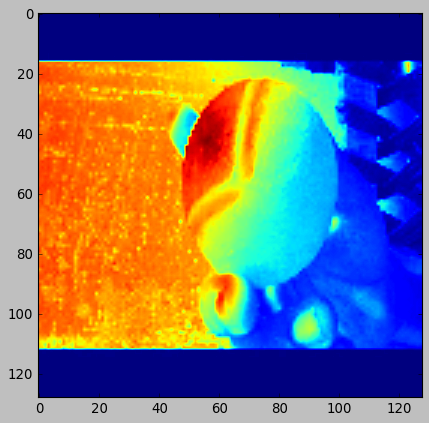

In [512]:
image = X_train[1203,:].reshape((128,128))
plt.imshow(image)
plt.show()

# Designing Model

In [513]:
input_shape=img_data[0].shape
# Design the CNN Sequential model
cnn_model = Sequential([
    Convolution2D(32,3,3,padding ='same',activation='relu',input_shape = input_shape),
    Convolution2D(32,3,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation = 'softmax')
])

In [514]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=["accuracy"])

In [515]:
cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 43, 43, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               200832    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)              

# Training Model

In [516]:
hist = cnn_model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))


Epoch 1/200
234/234 [==============================] - 15s 41ms/step - loss: 1.9085 - accuracy: 0.1754 - val_loss: 1.8548 - val_accuracy: 0.5486
Epoch 2/200
234/234 [==============================] - 8s 35ms/step - loss: 1.8401 - accuracy: 0.3502 - val_loss: 1.7702 - val_accuracy: 0.8485
Epoch 3/200
234/234 [==============================] - 9s 40ms/step - loss: 1.7523 - accuracy: 0.5618 - val_loss: 1.6735 - val_accuracy: 0.8485
Epoch 4/200
234/234 [==============================] - 9s 39ms/step - loss: 1.6616 - accuracy: 0.7060 - val_loss: 1.5588 - val_accuracy: 0.8485
Epoch 5/200
234/234 [==============================] - 9s 41ms/step - loss: 1.5442 - accuracy: 0.8017 - val_loss: 1.4223 - val_accuracy: 0.8485
Epoch 6/200
234/234 [==============================] - 9s 40ms/step - loss: 1.4096 - accuracy: 0.8356 - val_loss: 1.2621 - val_accuracy: 0.8485
Epoch 7/200
234/234 [==============================] - 9s 40ms/step - loss: 1.2545 - accuracy: 0.8454 - val_loss: 1.0898 - val_accuracy

234/234 [==============================] - 8s 34ms/step - loss: 0.4757 - accuracy: 0.8610 - val_loss: 0.4466 - val_accuracy: 0.8485
Epoch 58/200
234/234 [==============================] - 8s 35ms/step - loss: 0.4972 - accuracy: 0.8543 - val_loss: 0.4455 - val_accuracy: 0.8485
Epoch 59/200
234/234 [==============================] - 7s 32ms/step - loss: 0.4819 - accuracy: 0.8576 - val_loss: 0.4443 - val_accuracy: 0.8485
Epoch 60/200
234/234 [==============================] - 7s 30ms/step - loss: 0.4818 - accuracy: 0.8539 - val_loss: 0.4434 - val_accuracy: 0.8485
Epoch 61/200
234/234 [==============================] - 7s 31ms/step - loss: 0.4671 - accuracy: 0.8630 - val_loss: 0.4423 - val_accuracy: 0.8485
Epoch 62/200
234/234 [==============================] - 7s 31ms/step - loss: 0.4712 - accuracy: 0.8566 - val_loss: 0.4413 - val_accuracy: 0.8485
Epoch 63/200
234/234 [==============================] - 7s 31ms/step - loss: 0.4774 - accuracy: 0.8548 - val_loss: 0.4403 - val_accuracy: 0.848

234/234 [==============================] - 7s 32ms/step - loss: 0.4321 - accuracy: 0.8532 - val_loss: 0.3920 - val_accuracy: 0.8485
Epoch 114/200
234/234 [==============================] - 7s 32ms/step - loss: 0.4247 - accuracy: 0.8561 - val_loss: 0.3911 - val_accuracy: 0.8485
Epoch 115/200
234/234 [==============================] - 7s 31ms/step - loss: 0.4287 - accuracy: 0.8598 - val_loss: 0.3904 - val_accuracy: 0.8485
Epoch 116/200
234/234 [==============================] - 7s 29ms/step - loss: 0.4328 - accuracy: 0.8539 - val_loss: 0.3894 - val_accuracy: 0.8485
Epoch 117/200
234/234 [==============================] - 7s 30ms/step - loss: 0.4327 - accuracy: 0.8592 - val_loss: 0.3884 - val_accuracy: 0.8485
Epoch 118/200
234/234 [==============================] - 7s 30ms/step - loss: 0.4286 - accuracy: 0.8588 - val_loss: 0.3875 - val_accuracy: 0.8485
Epoch 119/200
234/234 [==============================] - 8s 32ms/step - loss: 0.4231 - accuracy: 0.8636 - val_loss: 0.3864 - val_accuracy:

234/234 [==============================] - 5s 19ms/step - loss: 0.4034 - accuracy: 0.8535 - val_loss: 0.3443 - val_accuracy: 0.8485
Epoch 170/200
234/234 [==============================] - 7s 29ms/step - loss: 0.3801 - accuracy: 0.8729 - val_loss: 0.3434 - val_accuracy: 0.8485
Epoch 171/200
234/234 [==============================] - 5s 20ms/step - loss: 0.4055 - accuracy: 0.8640 - val_loss: 0.3427 - val_accuracy: 0.8485
Epoch 172/200
234/234 [==============================] - 6s 27ms/step - loss: 0.3942 - accuracy: 0.8660 - val_loss: 0.3420 - val_accuracy: 0.8485
Epoch 173/200
234/234 [==============================] - 4s 19ms/step - loss: 0.3853 - accuracy: 0.8716 - val_loss: 0.3412 - val_accuracy: 0.8485
Epoch 174/200
234/234 [==============================] - 5s 21ms/step - loss: 0.3987 - accuracy: 0.8607 - val_loss: 0.3403 - val_accuracy: 0.8485
Epoch 175/200
234/234 [==============================] - 5s 19ms/step - loss: 0.3684 - accuracy: 0.8710 - val_loss: 0.3395 - val_accuracy:

# Evaluation

In [517]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)

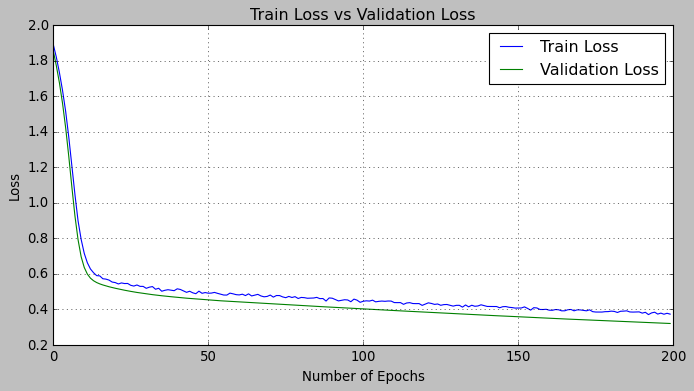

In [518]:
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])

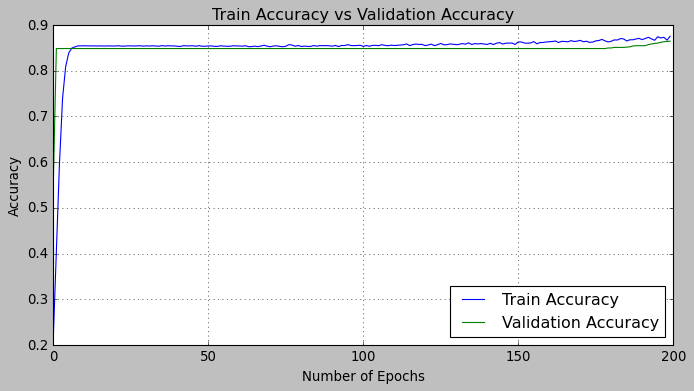

In [519]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

In [520]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.3210279047489166
Test Accuracy: 0.864713191986084


In [524]:
data_dir_list

['ball', 'book', 'clock', 'human', 'schoolbag', 'smartphone', 'sunglasses']

# Predicting

In [302]:
test_image = X_test[0:1]
print (test_image.shape)
print(cnn_model.predict(test_image))
print(cnn_model.predict_classes(test_image))
print(y_test[0:1])

(1, 128, 128, 1)
[[3.51e-02 4.78e-03 3.77e-03 1.18e-03 9.42e-01 1.34e-02 8.37e-05]]
[4]
[[0. 0. 0. 0. 1. 0. 0.]]


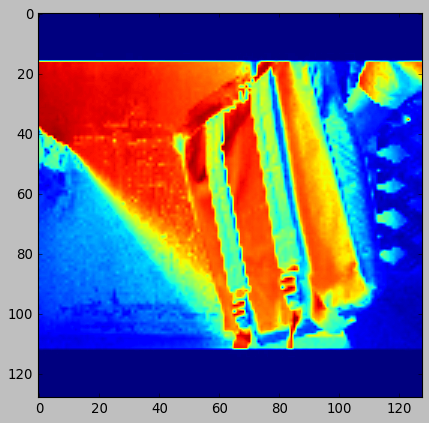

In [303]:
image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

# Capturing Image for Prediction

In [319]:
test_path = r"C:/Users/aatif/Documents/MachineLearning & Deep Learning/Final Project/image/test_data/"
#os.mkdir(test_path)

In [ ]:
test_cap = cv2.VideoCapture(0)
pct = 0
while True:
    
    # frame frame
    _, test_pic = test_cap.read()
    

   
    cv2.imshow("Test Cam", test_pic)
    
    if cv2.waitKey(0) & 0xFF == ord('s'):
        
        cv2.imwrite(test_path+'/test'  +str(pct)+'.jpg',test_pic)
        pct +=1
        print(pct)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break
        
test_cap.release()
cv2.destroyAllWindows()

In [340]:
ex_img_list = []

ex_list=os.listdir(test_path)
for img in ex_list:
    ex_img=cv2.imread(test_path + '/'+ img )
    ex_img=cv2.cvtColor(ex_img, cv2.COLOR_BGR2GRAY)
    ex_img_resize=cv2.resize(ex_img,(128,128))
    ex_img_list.append(ex_img_resize)

(128, 128)


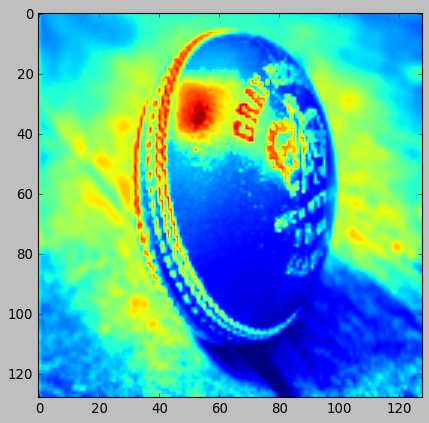

(1, 128, 128, 1)
[4]
schoolbag
(128, 128)


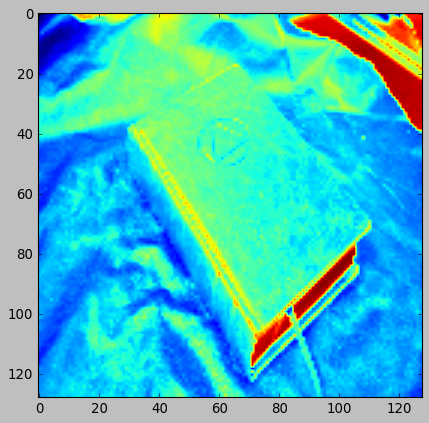

(1, 128, 128, 1)
[4]
schoolbag
(128, 128)


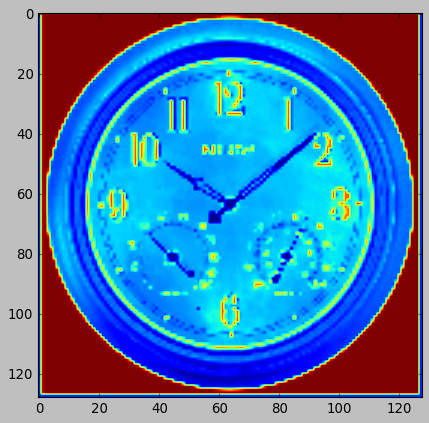

(1, 128, 128, 1)
[1]
book
(128, 128)


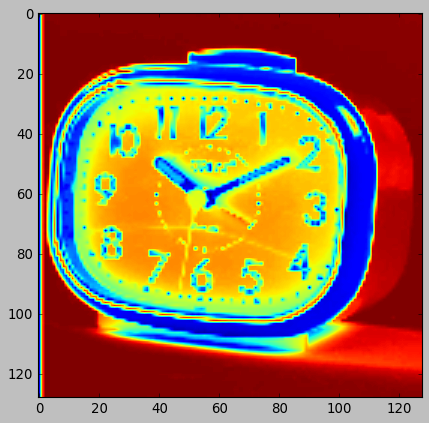

(1, 128, 128, 1)
[3]
human
(128, 128)


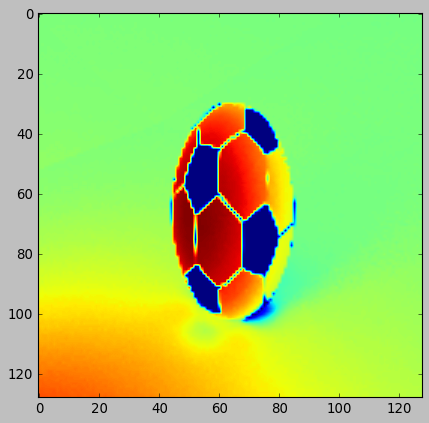

(1, 128, 128, 1)
[3]
human
(128, 128)


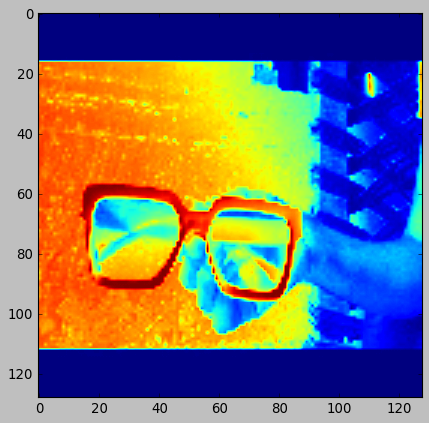

(1, 128, 128, 1)
[0]
ball
(128, 128)


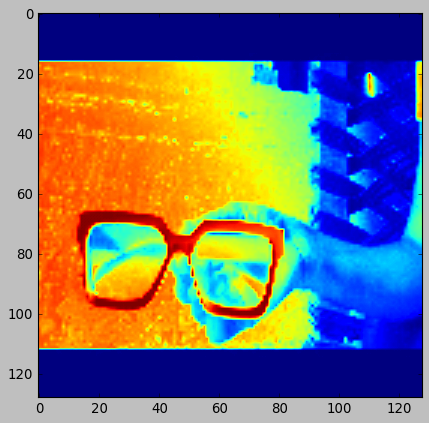

(1, 128, 128, 1)
[0]
ball
(128, 128)


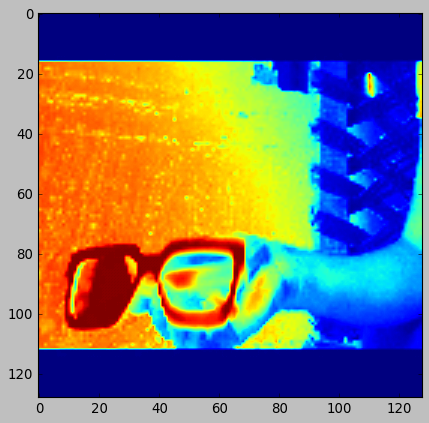

(1, 128, 128, 1)
[0]
ball
(128, 128)


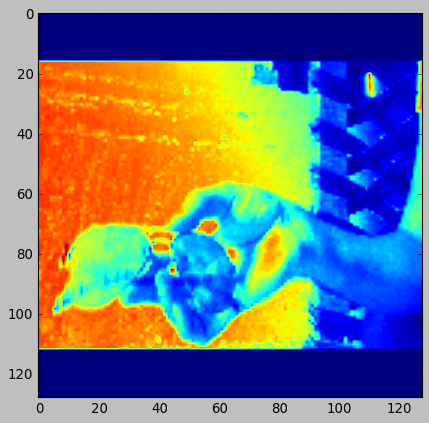

(1, 128, 128, 1)
[0]
ball
(128, 128)


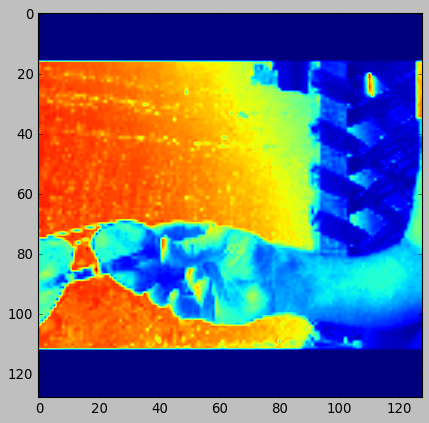

(1, 128, 128, 1)
[0]
ball
(128, 128)


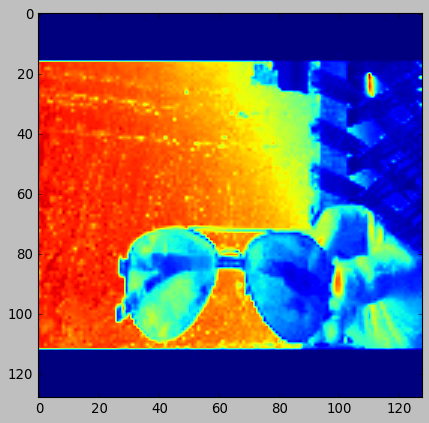

(1, 128, 128, 1)
[0]
ball
(128, 128)


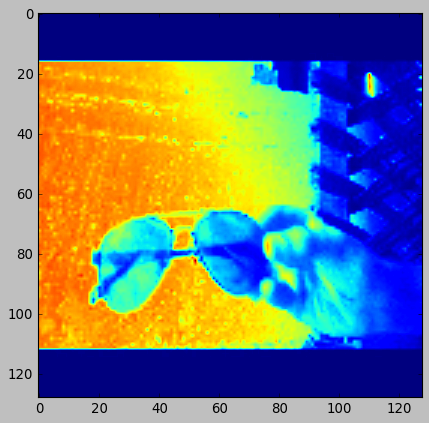

(1, 128, 128, 1)
[0]
ball
(128, 128)


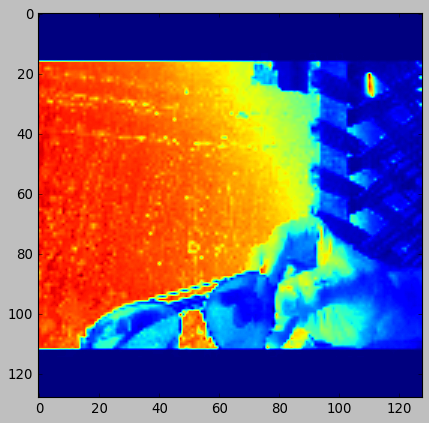

(1, 128, 128, 1)
[0]
ball
(128, 128)


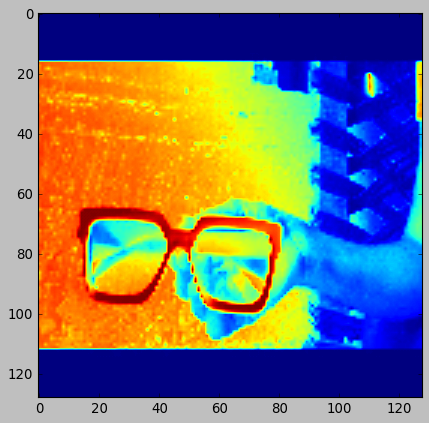

(1, 128, 128, 1)
[0]
ball
(128, 128)


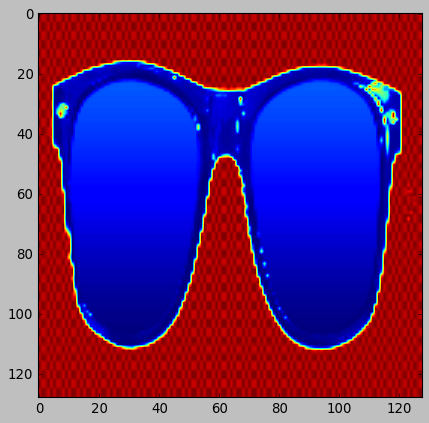

(1, 128, 128, 1)
[1]
book
(128, 128)


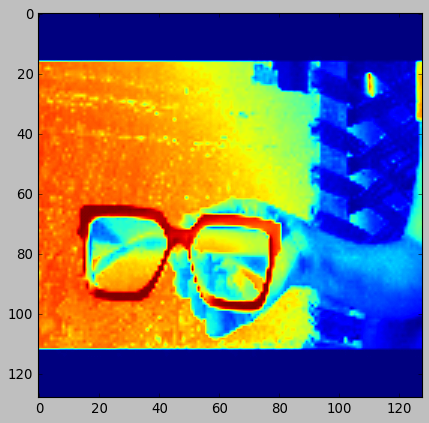

(1, 128, 128, 1)
[0]
ball
(128, 128)


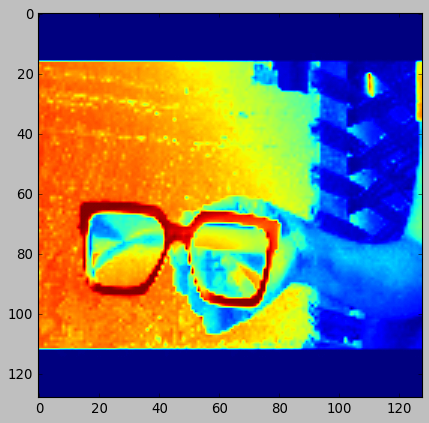

(1, 128, 128, 1)
[0]
ball
(128, 128)


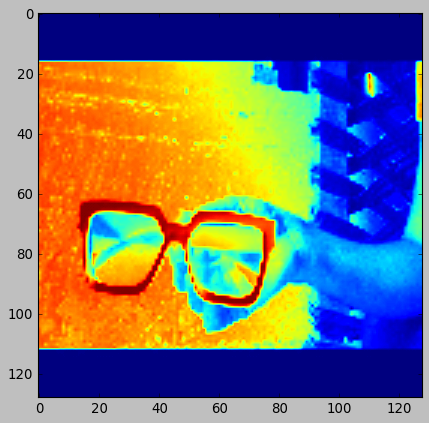

(1, 128, 128, 1)
[0]
ball
(128, 128)


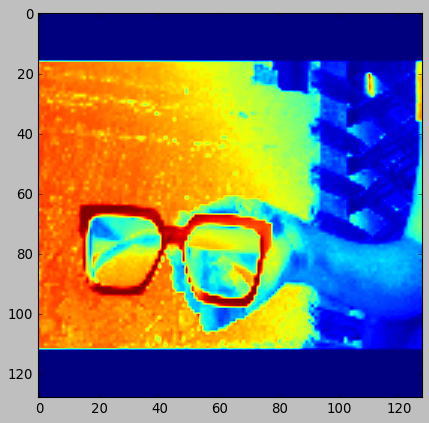

(1, 128, 128, 1)
[0]
ball
(128, 128)


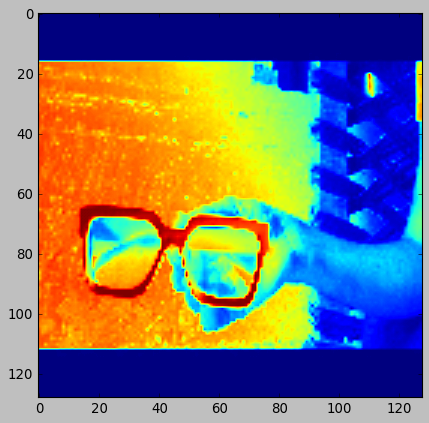

(1, 128, 128, 1)
[0]
ball
(128, 128)


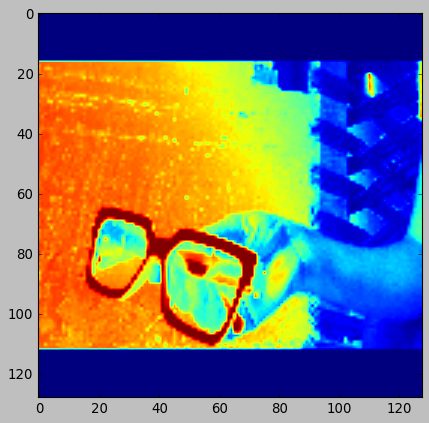

(1, 128, 128, 1)
[0]
ball
(128, 128)


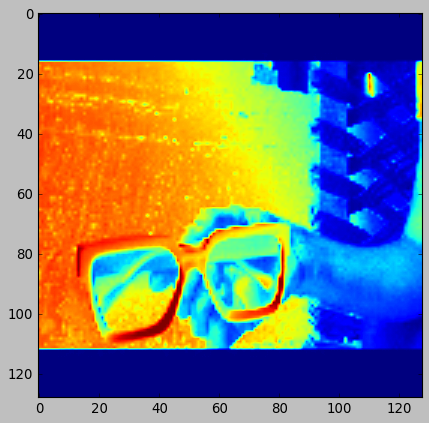

(1, 128, 128, 1)
[0]
ball


In [359]:
#test_img = cv2.imread(r'C:\Users\aatif\Documents\MachineLearning & Deep Learning\Final Project\test_data\clock1.PNG')
#test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
#test_img = cv2.resize(test_img,(128,128))

for img in ex_img_list:

    test_img = np.array(img)
    test_img = test_img.astype('float32')
    test_img /= 255
    print(test_img.shape)
    image = test_img.reshape((128,128))
    plt.imshow(image)
    plt.show()
    #print((cnn_model.predict(test_img)))
    if num_channel==1:
        if K.image_data_format()=='th':
            test_img= np.expand_dims(test_img, axis=0)
            test_img= np.expand_dims(test_img, axis=0)
            print (test_img.shape)
        else:
            test_img= np.expand_dims(test_img, axis=2) 
            test_img= np.expand_dims(test_img, axis=0)
            print (test_img.shape)
        
    else:
        if K.image_data_format()=='th':
            test_img=np.rollaxis(test_img,2,0)
            test_img= np.expand_dims(test_img, axis=0)
            print (test_img.shape)
        else:
            test_img= np.expand_dims(test_img, axis=0)
            print (test_img.shape)
    print(cnn_model.predict_classes(test_img))
    print(names[cnn_model.predict_classes(test_img)[0]])